In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
base_data_dir = '/srv/scratch/z5370003/projects/data/groundwater/FEFLOW/coastal/variable_density/'
raw_data_dir = os.path.join(base_data_dir, 'all')
filtered_data_dir = os.path.join(base_data_dir, 'filter')

In [7]:
ts_files = os.listdir(filtered_data_dir)
ts_files = sorted(ts_files)
ts_files[:3], ts_files[-3:]

(['0000.csv', '0002.csv', '0004.csv'], ['1904.csv', '1906.csv', '1908.csv'])

In [8]:
def interpolate(X, Y, Z, values):
    from scipy.interpolate import griddata
    import numpy as np
    
    # Get min/max bounds for each dimension
    x_min, x_max = X.min(), X.max()
    y_min, y_max = Y.min(), Y.max()
    z_min, z_max = Z.min(), Z.max()
    
    # Create regular 3D grid
    x_grid = np.linspace(x_min, x_max, 40)
    y_grid = np.linspace(y_min, y_max, 40)
    z_grid = np.linspace(z_min, z_max, 40)
    
    # Create meshgrid for interpolation points
    X_interp, Y_interp, Z_interp = np.meshgrid(x_grid, y_grid, z_grid)
    
    # Combine input coordinates
    points = np.column_stack((X, Y, Z))

    
    # Interpolate values onto regular grid
    interpolated = griddata(points, values, 
                          (X_interp, Y_interp, Z_interp), 
                          method='linear',
                          fill_value=np.nan)
    
    interpolated = np.transpose(interpolated, (1, 0, 2))
    
    return interpolated, x_grid, y_grid, z_grid

In [9]:
import numpy as np
import tqdm

# interpolated_data = []


# for ts_file in tqdm.tqdm(ts_files):
#     res_df = pd.read_csv(os.path.join(filtered_data_dir, ts_file))
#     origin = res_df[['X', 'Y', 'Z']].min().values

#     inter_res, x_grid, y_grid, z_grid = interpolate(res_df.X, res_df.Y, 
#                                                        res_df.Z, res_df['head'])
    
#     interpolated_data.append(inter_res)

# interpolated_data = np.array(interpolated_data)
# print(interpolated_data.shape)


In [16]:
interpolated_dir = os.path.join(base_data_dir, 'interpolated')
inter_res_all = np.load(os.path.join(interpolated_dir, 'data.npy'))


x_grid = np.load(os.path.join(interpolated_dir, 'x_grid.npy'))
y_grid = np.load(os.path.join(interpolated_dir, 'y_grid.npy'))
z_grid = np.load(os.path.join(interpolated_dir, 'z_grid.npy'))

inter_res_all.shape

(955, 40, 40, 40)

In [22]:
inter_res = inter_res_all[5]
res_df = pd.read_csv(os.path.join(filtered_data_dir, ts_files[5]))

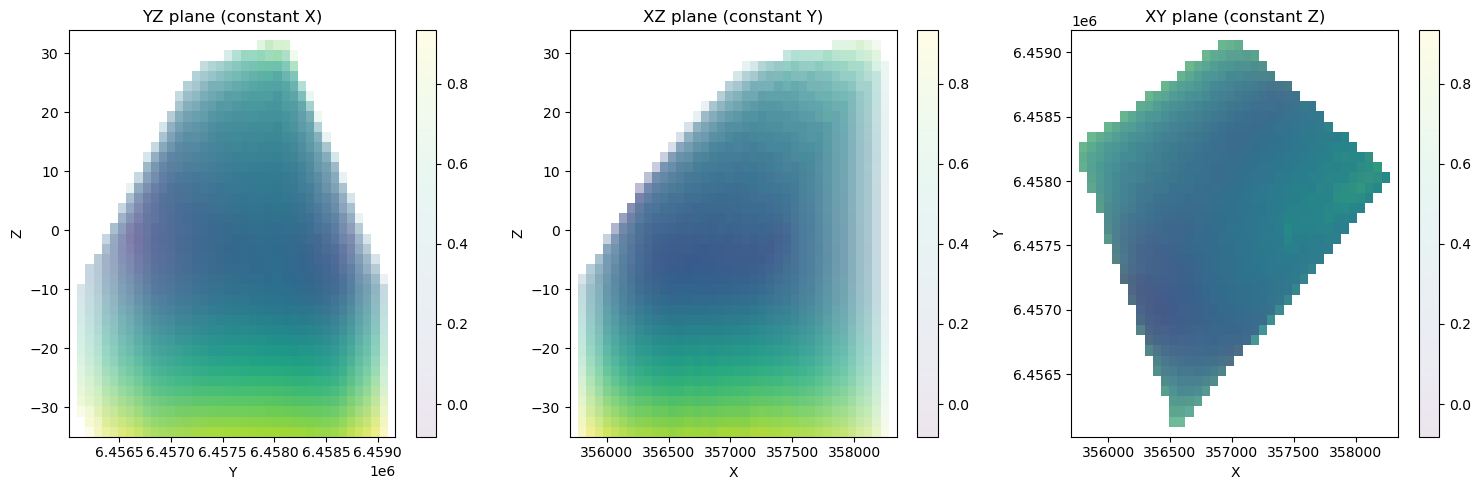

In [23]:
import matplotlib.pyplot as plt

# Create a figure with 3 subplots for different slices
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

vmin = np.nanmin(inter_res)
vmax = np.nanmax(inter_res)

# Plot slices through the middle of each dimension
middle_x = inter_res.shape[0]//2
middle_y = inter_res.shape[1]//2 
middle_z = inter_res.shape[2]//2

# YZ plane (constant X)
for ix in range(inter_res.shape[0]):
    im1 = ax1.imshow(inter_res[ix,:,:].T, aspect='auto', 
                    extent=[y_grid[0], y_grid[-1], z_grid[0], z_grid[-1]],
                    origin='lower', cmap='viridis', alpha=0.1, vmin=vmin, vmax=vmax)
ax1.set_title('YZ plane (constant X)')
ax1.set_xlabel('Y')
ax1.set_ylabel('Z')
plt.colorbar(im1, ax=ax1)

# XZ plane (constant Y)
for iy in range(inter_res.shape[1]):
    im2 = ax2.imshow(inter_res[:,iy,:].T, aspect='auto',
                    extent=[x_grid[0], x_grid[-1], z_grid[0], z_grid[-1]],
                    origin='lower', cmap='viridis', alpha=0.1, vmin=vmin, vmax=vmax)
ax2.set_title('XZ plane (constant Y)')
ax2.set_xlabel('X')
ax2.set_ylabel('Z')
plt.colorbar(im2, ax=ax2)

# XY plane (constant Z)
for iz in range(inter_res.shape[2]):
    im3 = ax3.imshow(inter_res[:,:,iz].T, aspect='auto',
                    extent=[x_grid[0], x_grid[-1], y_grid[0], y_grid[-1]],
                    origin='lower', cmap='viridis', alpha=0.1, vmin=vmin, vmax=vmax)
ax3.set_title('XY plane (constant Z)')
ax3.set_xlabel('X')
ax3.set_ylabel('Y')
plt.colorbar(im3, ax=ax3)

plt.tight_layout()
plt.show()


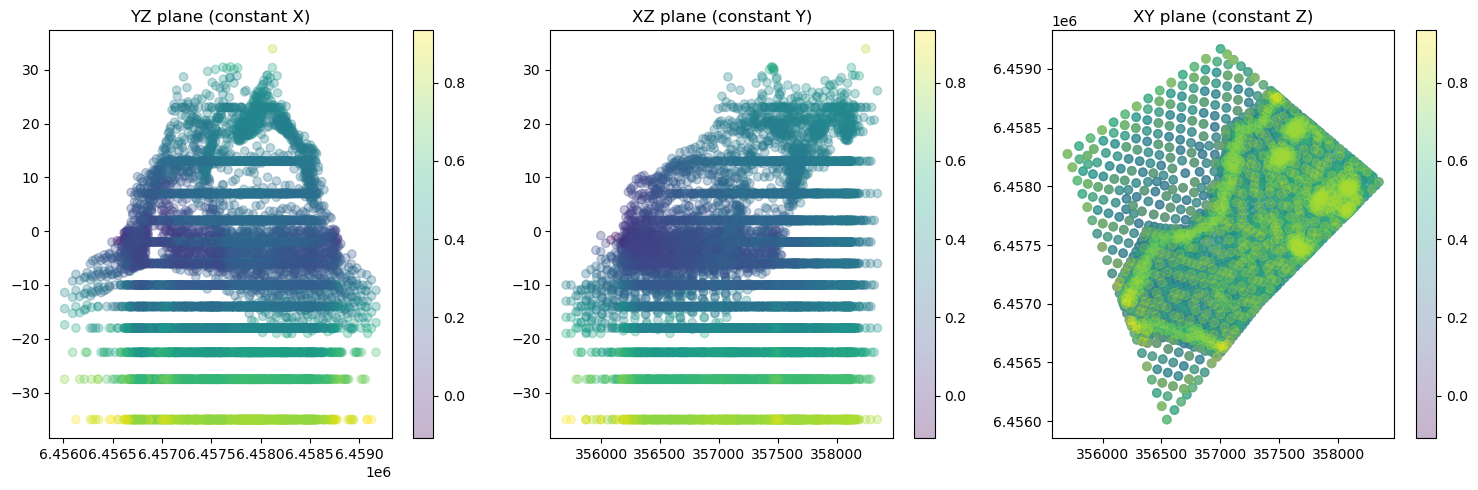

In [24]:
# Create a figure with 3 subplots for different slices
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

# YZ plane (constant X)
ax1.scatter(res_df.Y, res_df.Z, c=res_df['head'], cmap='viridis', alpha=0.3)
ax1.set_title('YZ plane (constant X)')
plt.colorbar(ax1.collections[0], ax=ax1)

# XZ plane (constant Y)
ax2.scatter(res_df.X, res_df.Z, c=res_df['head'], cmap='viridis', alpha=0.3)
ax2.set_title('XZ plane (constant Y)')
plt.colorbar(ax2.collections[0], ax=ax2)

# XY plane (constant Z)
ax3.scatter(res_df.X, res_df.Y, c=res_df['head'], cmap='viridis', alpha=0.3)
ax3.set_title('XY plane (constant Z)')
plt.colorbar(ax3.collections[0], ax=ax3)

plt.tight_layout()
plt.show()

